# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [1]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

ID                      Name Sex   Age  Height  Weight     Team  NOC  \
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0  Finland  FIN   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
42  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
48  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   

          Games  Year  Season    City       Sport  \
40  2014 Winter  2014  Winter   Sochi  Ice Hockey   
41  1948 Summer  1948  Summer  London  Gymnastics   
42  1948 Summer  1948  Summer  London  Gymnastics   
44  1948 Summer  1948  Summer  London  Gymnastics   
48  1948 Summer  1948  Summer  London  Gymnastics   

                                     Event   Medal  
40             Ice Hockey Men's Ice Hockey  Bronze  
41  Gymnastics Men's Individual All-Around  Bronze  
42        Gymnastics Men's Team All-Around    Gold  
44            Gymnastics Men's Horse Vault    Gold  
48        Gymnastics Men's Pommelled Horse    Gold

**Получение различной информации**

In [2]:
df.shape

(30181, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [4]:
df.describe()

ID           Age        Height        Weight          Year
count   30181.000000  30181.000000  30181.000000  30181.000000  30181.000000
mean    70225.949604     25.429012    177.642358     73.753554   1988.005964
std     38839.720551      5.049684     10.924188     15.004992     22.718451
min        16.000000     13.000000    136.000000     28.000000   1896.000000
25%     37494.000000     22.000000    170.000000     63.000000   1976.000000
50%     69771.000000     25.000000    178.000000     73.000000   1992.000000
75%    104111.000000     28.000000    185.000000     83.000000   2006.000000
max    135563.000000     66.000000    223.000000    182.000000   2016.000000

**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [5]:
df['Medal'].value_counts()

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [6]:
df_medals = df[df['Medal'] == 'Gold']
df_medals['Team'].value_counts()

United States    2075
Soviet Union      961
Germany           508
East Germany      368
Russia            356
                 ... 
Slaghoken II        1
Suriname            1
Jordan              1
Cote d'Ivoire       1
Tajikistan          1
Name: Team, Length: 157, dtype: int64

**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [7]:
pd.crosstab(df['Sex'],df['Sport'])

Sport  Alpine Skiing  Archery  Art Competitions  Athletics  Badminton  \
Sex                                                                     
F                180      100                 0       1239         73   
M                174      106                 2       2409         81   

Sport  Baseball  Basketball  Beach Volleyball  Biathlon  Bobsleigh  ...  \
Sex                                                                 ...   
F             0         390                35       147         24  ...   
M           333         610                33       241        259  ...   

Sport  Table Tennis  Taekwondo  Tennis  Trampolining  Triathlon  Tug-Of-War  \
Sex                                                                           
F                80         72      84            14         15           0   
M                83         72      89            15         15           8   

Sport  Volleyball  Water Polo  Weightlifting  Wrestling  
Sex                                                      
F             469         191            105         68  
M             489         573            427        899  

[2 rows x 55 columns]

**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [8]:
df_F_H = df[df['Sex']=='F']
df_F_H = df_F_H[df_F_H['Sport']=='Ice Hockey']
[df_F_H['Age'].mean(),df_F_H['Age'].std()]

[24.42, 4.360463907080283]

**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [9]:
df_medals_F = df[df['Medal'] == 'Bronze']
df_medals_F = df_medals_F[df_medals_F['Sex'] == 'F']
df_medals_F['Team'].value_counts()

United States            360
Germany                  226
Canada                   196
Australia                186
Soviet Union             186
                        ... 
Uzbekistan                 1
France-1                   1
Serbia and Montenegro      1
Armenia                    1
Tajikistan                 1
Name: Team, Length: 115, dtype: int64

**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

<AxesSubplot:>

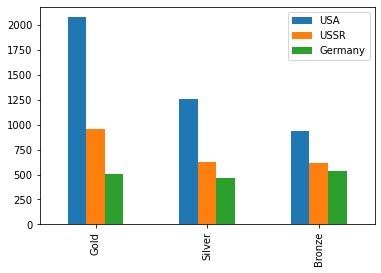

In [10]:
df_medals_overall = df[['Medal','Team']]
df_medals_USA = df_medals_overall[df_medals_overall['Team'] == 'United States']
df_medals_USA = [df_medals_USA[df_medals_USA['Medal'] == 'Gold'].value_counts(),df_medals_USA[df_medals_USA['Medal'] == 'Silver'].value_counts(),df_medals_USA[df_medals_USA['Medal'] == 'Bronze'].value_counts()]
df_medals_USSR = df_medals_overall[df_medals_overall['Team'] == 'Soviet Union']
df_medals_USSR = [df_medals_USSR[df_medals_USSR['Medal'] == 'Gold'].value_counts(),df_medals_USSR[df_medals_USSR['Medal'] == 'Silver'].value_counts(),df_medals_USSR[df_medals_USSR['Medal'] == 'Bronze'].value_counts()]
df_medals_Germany = df_medals_overall[df_medals_overall['Team'] == 'Germany']
df_medals_Germany = [df_medals_Germany[df_medals_Germany['Medal'] == 'Gold'].value_counts(),df_medals_Germany[df_medals_Germany['Medal'] == 'Silver'].value_counts(),df_medals_Germany[df_medals_Germany['Medal'] == 'Bronze'].value_counts()]
df_medals_USA_F = [df_medals_USA[0][0],df_medals_USA[1][0],df_medals_USA[2][0]]
df_medals_USSR_F = [df_medals_USSR[0][0],df_medals_USSR[1][0],df_medals_USSR[2][0]]
df_medals_Germany_F = [df_medals_Germany[0][0],df_medals_Germany[1][0],df_medals_Germany[2][0]]
df_forhist = pd.DataFrame({'USA': df_medals_USA_F,'USSR': df_medals_USSR_F,'Germany': df_medals_Germany_F},index = ['Gold','Silver','Bronze'])
df_forhist.plot.bar()

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

<AxesSubplot:ylabel='Density'>

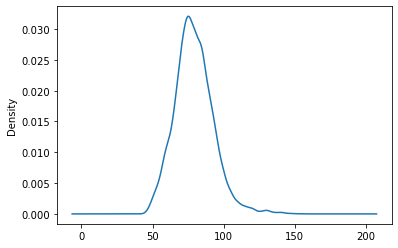

In [11]:
df_M_S = df[['Medal','Sex','Weight']]
df_M_S = df_M_S[df_M_S['Sex'] == 'M']
df_M_S = df_M_S[df_M_S['Medal'] == 'Silver']
df_M_S['Weight'].plot.kde()

**8. Постройте boxplot для возраста участника в зависимости от медали**

<AxesSubplot:title={'center':'Age'}, xlabel='[Medal]'>

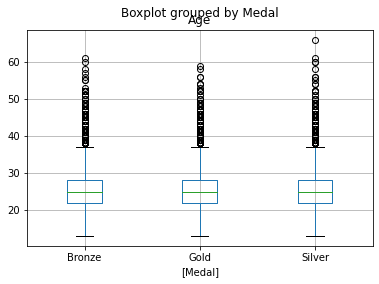

In [12]:
df_Raw_Age = df[['Medal','Age']]
df_Gold_Age = df_Raw_Age[df_Raw_Age['Medal']=='Gold']
df_Silver_Age = df_Raw_Age[df_Raw_Age['Medal']=='Silver']
df_Bronze_Age = df_Raw_Age[df_Raw_Age['Medal']=='Bronze']
df_Raw_Age.boxplot(by = 'Medal')

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

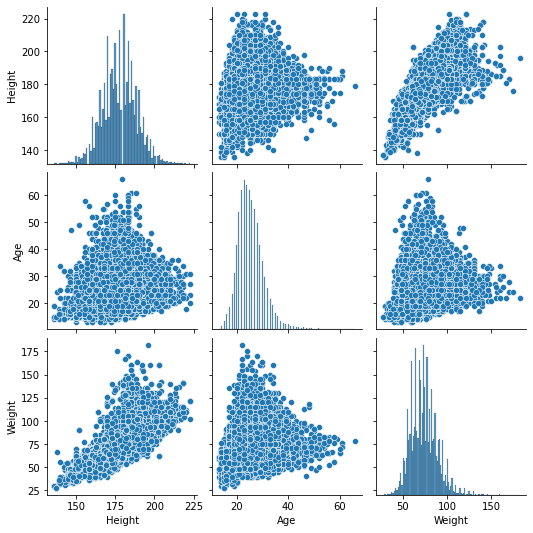

In [13]:
df_pp = df[['Height','Age','Weight']]
sns.pairplot(df_pp)